<a href="https://colab.research.google.com/github/Rohunu/Assessment-Task/blob/main/data_preprocessing_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


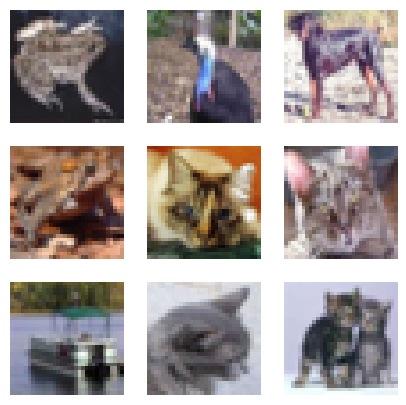

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load CIFAR-10 Dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values (0-255 -> 0-1)
X_train, X_test = X_train / 255.0, X_test / 255.0

# Convert labels to categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split into train, validation, and test sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
datagen.fit(X_train)

# Show sample images
plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i])
    plt.axis("off")
plt.show()


In [4]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load pre-trained ResNet50
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(32, 32, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = Flatten()(base_model.output)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(10, activation="softmax")(x)

# Define the model
model = Model(inputs=base_model.input, outputs=x)
model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
early_stop = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), validation_data=(X_val, y_val),
                    epochs=20, callbacks=[early_stop])

# Save the model
model.save("image_classifier.h5")

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 303s 232ms/step - accuracy: 0.1310 - loss: 2.6033 - val_accuracy: 0.2324 - val_loss: 2.1558
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 289s 231ms/step - accuracy: 0.1935 - loss: 2.1723 - val_accuracy: 0.2518 - val_loss: 2.0766
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 286s 229ms/step - accuracy: 0.2298 - loss: 2.1055 - val_accuracy: 0.2779 - val_loss: 2.0043
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 247s 198ms/step - accuracy: 0.2393 - loss: 2.0608 - val_accuracy: 0.3008 - val_loss: 1.9644
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 234s 188ms/step - accuracy: 0.2544 - loss: 2.0374 - val_accuracy: 0.2984 - val_loss: 1.9488
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 233s 186ms/step - accuracy: 0.2616 - loss: 2.0207 - val_accuracy: 0.3036 - val_loss: 1.9322
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 234s 188ms/step - accuracy: 0.2725 - loss: 1.9918 - val_accuracy: 0.3182 - val_loss: 1.9027
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 231s 185ms/step - ac

313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 134ms/step - accuracy: 0.3697 - loss: 1.7728
Test Accuracy: 0.36


In [ ]:
# Required imports (ensure Step 1 and 2 ran first)
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import os

# Load pre-trained ResNet50
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(32, 32, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = Flatten()(base_model.output)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(10, activation="softmax")(x)

# Define the model
model = Model(inputs=base_model.input, outputs=x)
model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
early_stop = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_val, y_val),
                    epochs=20,
                    callbacks=[early_stop])

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

# Save the model
model.save("image_classifier.h5")
print("Model saved as 'image_classifier.h5'")

# Verify the file exists
if os.path.exists("image_classifier.h5"):
    print("File 'image_classifier.h5' exists in Colab storage.")
else:
    print("Error: File 'image_classifier.h5' was not saved.")

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 249s 192ms/step - accuracy: 0.1355 - loss: 2.4931 - val_accuracy: 0.2410 - val_loss: 2.1494
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 235s 188ms/step - accuracy: 0.2035 - loss: 2.1644 - val_accuracy: 0.2786 - val_loss: 2.0460
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 236s 189ms/step - accuracy: 0.2295 - loss: 2.0978 - val_accuracy: 0.2839 - val_loss: 1.9945
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 236s 189ms/step - accuracy: 0.2407 - loss: 2.0584 - val_accuracy: 0.2909 - val_loss: 1.9570
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 235s 188ms/step - accuracy: 0.2504 - loss: 2.0265 - val_accuracy: 0.3028 - val_loss: 1.9395
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 235s 188ms/step - accuracy: 0.2682 - loss: 2.0041 - val_accuracy: 0.3061 - val_loss: 1.9151
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 277s 222ms/step - accuracy: 0.2731 - loss: 1.9920 - val_accuracy: 0.3178 - val_loss: 1.9031
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 235s 188ms/step - ac